# STOR 120: Take Home Midterm 1

60 points total

**Due:** Wednesday, February 9th to Gradescope before the start of class time.

    Section 001: 12:20pm
    Section 002:  1:25pm
  
**Directions:** The exam is open book, notes, course materials, internet, and all things that are not direct communication with others. Just as with all course assignments, you will submit exams to Gradescope as Jupyter Notebooks with the ipynb file extension. To receive full credit, you should show all of your code used to answer each question. Make sure to view your submission in Gradescope and verify that it is the correct file and has the format that you intended it to have, including all code being shown and run.

Come to office hours if you have specific questions regarding the exam. Due to the large class sizes, individual questions sent via email are not possible to answer for all students. Please refrain from posting public questions to Piazza before the exam is due.  

**Data:** The dataset used on this exam contains an overview of the 50 most crowded airports in the world for each year from 2016 to 2020. Each row in the table is an airport in the given year with the following atttributes:

Variable   | Description
-----------|---------------------------------------------------------------
Rank       | Airport ranking by number of passengers for given year
Airport    | Name of the airport
Location   | Location of the airport
Country    | Airport Country
IATA Code  | Three-letter code designating the airport defined by the International Air Transport Association
ICAO Code  | Four-letter code designating the airport as defined by the International Civil Aviation Organization
Passengers | Total number of passengers for the given year
Year       | Year of ranking

**Run the cell below to import the needed modules and dataset.**

In [1]:
from datascience import *
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore', FutureWarning)

Airports = pd.read_csv('../Datasets/Airports.csv')
Airports

,Rank,Airport,Location,Country,IATA Code,ICAO Code,Passengers,Year
0,1,China Guangzhou Baiyun International Airport,"Baiyun-Huadu, Guangzhou, Guangdong",China,CAN,ZGGG,43760427,2020
1,2,United States Hartsfield–Jackson Atlanta Inter...,"Atlanta, Georgia",United States,ATL,KATL,42918685,2020
2,3,China Chengdu Shuangliu International Airport,"Shuangliu-Wuhou, Chengdu, Sichuan",China,CTU,ZUUU,40741509,2020
3,4,United States Dallas/Fort Worth International ...,"Dallas-Fort Worth, Texas",United States,DFW,KDFW,39364990,2020
4,5,China Shenzhen Bao'an International Airport,"Bao'an, Shenzhen, Guangdong",China,SZX,ZGSZ,37916059,2020
...,...,...,...,...,...,...,...,...
245,46,United States Newark Liberty International Air...,"Newark, New Jersey",United States,EWR,KEWR,40289969,2016
246,47,Philippines Ninoy Aquino International Airport,"Pasay/Parañaque, Metro Manila",Philippines,MNL,RPLL,39534991,2016
247,48,Japan Narita International Airport,"Narita, Chiba",Japan,NRT,RJAA,39000563,2016
248,49,United States Minneapolis/St Paul Internationa...,"St. Paul, Minnesota",United States,MSP,KMSP,37413728,2016


### Question 1.1 *(4 pts)*

What is the total number of passengers in the top 50 most crowded airports in 2020? Assign `tot_pass_2020` to this value.

In [2]:
sorted_airports = Airports.sort_values("Passengers").head(10)
sorted_airports["Passengers"]
# I dont need to filter for years because these top 10 are all in the year 2020

49    15892892
48    16091449
47    16300000
46    16409625
45    16484132
44    16490216
43    16583878
42    16630642
41    16706000
40    16710197
Name: Passengers, dtype: int64

In [3]:
tot_pass_2020 = sorted_airports["Passengers"].sum()
print(tot_pass_2020)

164299031


### Question 1.2 *(4 pts)*

What are the names of the airports with the largest number of passengers in each of the years? Assign `busiest_airports` to an array containing the names of these airports (possibly with repeated names of the same airport), in descending order of their passenger totals.

Note: You may see **\xa0** in the strings for the names of the airports. This is fine and due to the encoding of the data.

In [4]:
Airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        250 non-null    int64 
 1   Airport     250 non-null    object
 2   Location    250 non-null    object
 3   Country     250 non-null    object
 4   IATA Code   250 non-null    object
 5   ICAO Code   250 non-null    object
 6   Passengers  250 non-null    int64 
 7   Year        250 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 15.8+ KB


In [5]:
# NOTE: THIS IS ASKING FOR THE MAX FROM EACH YEAR 
Airports["Year"].unique()

# NOTE: IN DESCENDING ORDER FROM PASSENGER TOTALS 

# 2016
Airports_2016 = Airports[Airports["Year"] == 2016] 
Airports_max_2016 = Airports_2016["Passengers"].index.max()
a2016 = Airports_2016.loc[[Airports_max_2016]]

# 2017
Airports_2017 = Airports[Airports["Year"] == 2017] 
Airports_max_2017 = Airports_2017["Passengers"].index.max()
a2017 = Airports_2017.loc[[Airports_max_2017]]

# 2018
Airports_2018 = Airports[Airports["Year"] == 2018] 
Airports_max_2018 = Airports_2018["Passengers"].index.max()
a2018 = Airports_2018.loc[[Airports_max_2018]]

# 2019
Airports_2019 = Airports[Airports["Year"] == 2019] 
Airports_max_2019 = Airports_2019["Passengers"].index.max()
a2019 = Airports_2019.loc[[Airports_max_2019]]

# 2020
Airports_2020 = Airports[Airports["Year"] == 2020] 
Airports_max_2020 = Airports_2020["Passengers"].index.max()
a2020 = Airports_2020.loc[[Airports_max_2020]]

In [6]:
combined_frame = pd.concat([a2016,a2017,a2018,a2019,a2020])
combined_frame_sorted = combined_frame.sort_values("Passengers")

In [7]:
check = make_array(combined_frame_sorted["Airport"])
check_2 = check[0]

In [8]:
busiest_airports = check_2
busiest_airports

array(['United States\xa0Newark Liberty International Airport',
       'Qatar\xa0Hamad International Airport',
       'Russia\xa0Sheremetyevo International Airport',
       'Japan\xa0Narita International Airport',
       'Japan\xa0Narita International Airport'], dtype=object)

### Question 1.3 *(4 pts)*

What is the average number of passengers in the top ranked airports for each of the years? Assign this value to `busiest_airports_average`.

In [9]:
# print(combined_frame)

In [10]:
# Average Number of Passengers for the 2016 Top Ranked Airport
QA_2016 = Airports[Airports["Airport"] == 'Qatar\xa0Hamad International Airport']["Passengers"].sum()
QA_entries = len(Airports[Airports["Airport"] == 'Qatar\xa0Hamad International Airport']["Passengers"])
QA_2016 = QA_2016/QA_entries

# Average Number of Passengers for the 2017 Top Ranked Airport
RU_2017 = Airports[Airports["Airport"] == 'Russia\xa0Sheremetyevo International Airport']["Passengers"].sum()
RU_entries = len(Airports[Airports["Airport"] == 'Russia\xa0Sheremetyevo International Airport']["Passengers"])
RU_2017 = RU_2017/RU_entries

# Average Number of Passengers for the 2018 Top Ranked Airport
JA_2018 = Airports[Airports["Airport"] == 'Japan\xa0Narita International Airport']["Passengers"].sum()
JA_entries = len(Airports[Airports["Airport"] == 'Japan\xa0Narita International Airport']["Passengers"])
JA_2018 = JA_2018/JA_entries

# Average Number of Passengers for the 2019 Top Ranked Airport

# Average Number of Passengers for the 2020 Top Ranked Airport 
tot_US = Airports[Airports["Airport"] == 'United States\xa0Newark Liberty International Airport']["Passengers"].sum()
US_entires = len(Airports[Airports["Airport"] == 'United States\xa0Newark Liberty International Airport']["Passengers"])
US_2020 = tot_US/US_entires # The US Newark airports have an average of 38395597.4 passengers over the course of 5 years

In [11]:
busiest_airport_average = {"Top Ranked Year":[2016,2017,2018,2019,2020],
                          "Airport Name":["Qatar Hamad International Airport", "Russia Sheremetyevo International Airport",
                                         "Japan Narita International Airport", "Japan Narita International Airport", 
                                         "United States Newark Liberty International Airport"], 
                          "Average Number of Passengers From 2016 to 2020":[QA_2016, RU_2017, JA_2018, JA_2018, US_2020]}
pd.DataFrame(busiest_airport_average)

,Top Ranked Year,Airport Name,Average Number of Passengers From 2016 to 2020
0,2016,Qatar Hamad International Airport,37283987.00
1,2017,Russia Sheremetyevo International Airport,38911453.25
2,2018,Japan Narita International Airport,41630444.00
3,2019,Japan Narita International Airport,41630444.00
4,2020,United States Newark Liberty International Air...,38395597.40


### Question 2.1 *(4 pts)*

Construct a new table `Airports2` that contains each of the rows and columns of the `Airports` table and also contains a new column, `Passengers in Millions`, which is the number of passengers for each airport counted in millions of passengers.  

In [12]:
Airports["Passengers in Millions"] = Airports["Passengers"]/1000000

In [13]:
Airports2 = Airports
print(Airports2.head(5))

   Rank                                            Airport  \
0     1       China Guangzhou Baiyun International Airport   
1     2  United States Hartsfield–Jackson Atlanta Inter...   
2     3      China Chengdu Shuangliu International Airport   
3     4  United States Dallas/Fort Worth International ...   
4     5        China Shenzhen Bao'an International Airport   

                             Location        Country IATA Code ICAO Code  \
0  Baiyun-Huadu, Guangzhou, Guangdong          China       CAN      ZGGG   
1                    Atlanta, Georgia  United States       ATL      KATL   
2   Shuangliu-Wuhou, Chengdu, Sichuan          China       CTU      ZUUU   
3            Dallas-Fort Worth, Texas  United States       DFW      KDFW   
4         Bao'an, Shenzhen, Guangdong          China       SZX      ZGSZ   

   Passengers  Year  Passengers in Millions  
0    43760427  2020               43.760427  
1    42918685  2020               42.918685  
2    40741509  2020             

### Question 2.2 *(4 pts)*

Use the `Airports2` table to construct a histogram for the numbers of passengers in the millions. Construct the histogram such that the bins begin at 10 million passengers, are 10 million passengers wide, and the histogram has bins containing all of the data from the airports in the table.

In [14]:
# Make hist of number of passengers in the millions 
# Bin begins at 10 million passangers, are 10 passengers wide, and all the date from teh airports in the table 
Airports2["Passengers in Millions"].describe()
# Max is 110

count    250.000000
mean      51.486173
std       20.027108
min       15.892892
25%       41.893894
50%       47.595593
75%       64.498943
max      110.531300
Name: Passengers in Millions, dtype: float64

In [15]:
my_bins = np.arange(10, 121, 10) # This is because the max value is 110.5 and I need a bin higher than just 110 to contain it
labels = ["10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-109", "100-109", "110-119"]

Text(0.5, 1.0, 'Millions of Passengers on Flights Between 2016 - 2020')

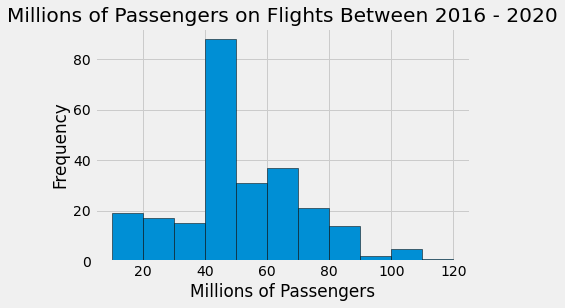

In [16]:
plt.hist(Airports2["Passengers in Millions"], my_bins, edgecolor = "black")
plt.xlabel("Millions of Passengers")
plt.ylabel("Frequency")
plt.title("Millions of Passengers on Flights Between 2016 - 2020")

### Question 2.3 *(2 pts)*

From the histogram constructed in the previous question, which binning of millions of passengers has the most airports in the data? Set `most_airports_bin` to an array containging two values, the lower and upper limits of that bin.

In [17]:
most_airports_bin = make_array(40, 49)
most_airports_bin

array([40, 49], dtype=int64)

### Question 2.4 *(4 pts)*

How many airports are in the bin from the previous question? Assign this value to `num_airports`. Consider each row of the data as a unique airport, even though the same airport may be shown over multiple years. You should calculate this number from the `Airports2` table and not estimate the value from the histogram.

In [18]:
Airports2["Bins"] = pd.cut(Airports2["Passengers in Millions"], my_bins, labels = labels)
Airports2["Bins"].isnull().sum() 
# One is null, I bet that is whatever is not gathered by the 10 
Airports2[Airports2["Bins"].isnull()].index.tolist()
Airports2.loc[[50]] # Fixed previous error in previous question, this is now in a bin 

Airports2["Bins"].value_counts()

40-49      88
60-69      37
50-59      31
70-79      21
10-19      19
20-29      17
30-39      15
80-89      14
100-109     5
90-109      2
110-119     1
Name: Bins, dtype: int64

In [19]:
num_airports = Airports2["Bins"].value_counts().max()
num_airports

88

### Question 3.1 *(8 pts)*

Construct a bar chart showing the number of times each country appears in the top 50 airports for all years in the data. The bar chart should have the country with the highest number of airports at the top, and then the remaining countries in decreasing order.

In [20]:
# The number of times each country appears in the top 50 airports for all years in the data 
Airports["Country"].unique()
countries = ['China', 'United States', 'Japan', 'India', 'United Arab Emirates',
       'Turkey', 'France', 'United Kingdom', 'Mexico', 'Vietnam',
       'South Korea', 'Netherlands', 'Brazil', 'Russia', 'Germany',
       'Spain', 'Thailand', 'Hong Kong SAR, China', 'Singapore',
       'Malaysia', 'Indonesia', 'Canada', 'Taiwan', 'Philippines',
       'Australia', 'Italy', 'The Netherlands', 'Republic of Korea',
       'Qatar']

Airports["Rank"].unique()
# There are only 50 ranks, so just make a value count of the countries 
Airports["Country"].value_counts()

United States           76
China                   49
United Kingdom           9
Spain                    9
Germany                  9
India                    9
Japan                    9
Turkey                   6
United Arab Emirates     5
Mexico                   5
Russia                   5
Thailand                 5
France                   5
Malaysia                 4
Australia                4
Philippines              4
Taiwan                   4
Canada                   4
Indonesia                4
Hong Kong SAR, China     4
Singapore                4
South Korea              4
Netherlands              3
Italy                    3
The Netherlands          2
Republic of Korea        2
Brazil                   1
Vietnam                  1
Qatar                    1
Name: Country, dtype: int64

Text(0.5, 1.0, 'Number of Times a Country Appears in the Top 50 Years From 2016 to 2020')

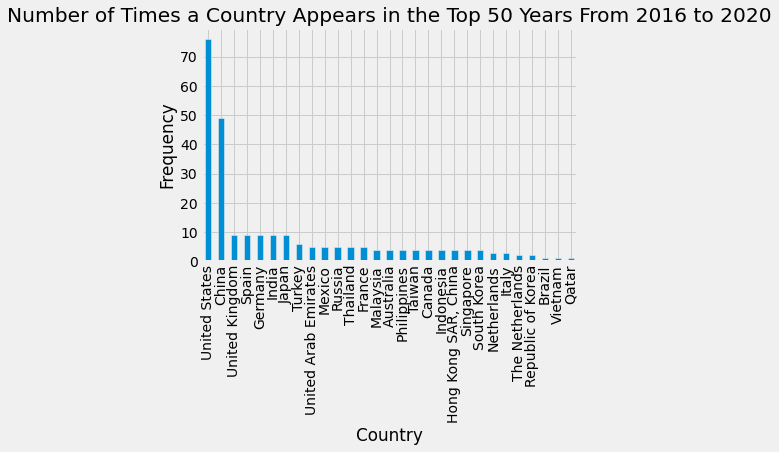

In [21]:
Airports["Country"].value_counts().plot(kind = "bar")
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Number of Times a Country Appears in the Top 50 Years From 2016 to 2020")

### Question 3.2 *(8 pts)*

You should see that China and the United States have many more airports in the data than other countries. Construct a table, `US_China_tot`, using only the airports in the United States and China (over all years) that has five rows, one for each year in the data, and columns for the year (in ascending order), the total number passengers in these airports in China for each year, and the total number passengers in these airports in the United States for each year.

Note: Depending on how you go about this problem, you may receive a **VisibleDeprecationWarning**. This is fine and will not impact your table.

In [22]:
Airports["Country"].unique()

array(['China', 'United States', 'Japan', 'India', 'United Arab Emirates',
       'Turkey', 'France', 'United Kingdom', 'Mexico', 'Vietnam',
       'South Korea', 'Netherlands', 'Brazil', 'Russia', 'Germany',
       'Spain', 'Thailand', 'Hong Kong SAR, China', 'Singapore',
       'Malaysia', 'Indonesia', 'Canada', 'Taiwan', 'Philippines',
       'Australia', 'Italy', 'The Netherlands', 'Republic of Korea',
       'Qatar'], dtype=object)

In [23]:
# GOal: Make a table that has chin and the US's airports passangers for each year 

# First Filter the data for just US and China
US = Airports[Airports["Country"] == "United States"]
China = Airports[Airports["Country"] == "China"]
US_China = Airports[(Airports["Country"] == "China") | (Airports["Country"] == "United States")]
# US_China["Country"].unique()
# US_China_grouped = US_China.groupby("Country")
# US_China_grouped["Year"].value_counts().plot(kind = "barh")

In [24]:
# Make manually 
US_total_2016_pass = US["Passengers"][US["Year"] == 2016].sum()
US_total_2017_pass = US["Passengers"][US["Year"] == 2017].sum()
US_total_2018_pass = US["Passengers"][US["Year"] == 2018].sum()
US_total_2019_pass = US["Passengers"][US["Year"] == 2019].sum()
US_total_2020_pass = US["Passengers"][US["Year"] == 2020].sum()

China_total_2016_pass = China["Passengers"][China["Year"] == 2016].sum()
China_total_2017_pass = China["Passengers"][China["Year"] == 2017].sum()
China_total_2018_pass = China["Passengers"][China["Year"] == 2018].sum()
China_total_2019_pass = China["Passengers"][China["Year"] == 2019].sum()
China_total_2020_pass = China["Passengers"][China["Year"] == 2020].sum()

# After you get each put into a dictionary, then set index to country 
# Then format according to the problem
# US_China_tot_part1 = {"Country":["United States", "China"], 
#                       "2016": [US_total_2016_pass, China_total_2016_pass], 
#                       "2017":[US_total_2017_pass, China_total_2017_pass], 
#                       "2018":[US_total_2018_pass, China_total_2018_pass], 
#                       "2019":[US_total_2019_pass, China_total_2019_pass],
#                       "2020":[US_total_2020_pass, China_total_2020_pass]}
# US_China_Passengers = pd.DataFrame(US_China_tot_part1)
# US_China_Passengers_t = US_China_Passengers.set_index("Country")
# US_China_Passengers_t.transpose()

# If I wanted the chart to be a little more proper 
US_China_tot_part2 = {"United States":[US_total_2016_pass, US_total_2017_pass, US_total_2018_pass, 
                                      US_total_2019_pass, US_total_2020_pass], 
                     "China":[China_total_2016_pass, China_total_2017_pass, China_total_2018_pass,
                             China_total_2019_pass, China_total_2020_pass], 
                     "Year":[2016,2017,2018,2019,2020]}
US_China_Passengers_pt2 = pd.DataFrame(US_China_tot_part2)
US_C_Pass = US_China_Passengers_pt2.set_index("Year")
US_C_Pass

,United States,China
Year,,
2016,886062548,390582892
2017,869980194,455506455
2018,904921387,482556514
2019,934865503,544055234
2020,368767320,472211986


In [25]:
US_China_tot = US_C_Pass
US_China_tot

,United States,China
Year,,
2016,886062548,390582892
2017,869980194,455506455
2018,904921387,482556514
2019,934865503,544055234
2020,368767320,472211986


### Question 3.3 *(4 pts)*

Using the `US_China_tot` table from the previous question, construct an appropriate plot that shows these totals for passengers over time for each of the two countries.

Text(0.5, 1.0, 'Passengers Over Time in the United States versus China')

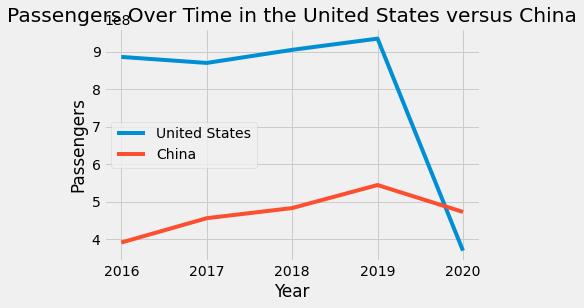

In [26]:
US_China_tot.plot()
plt.ylabel("Passengers")
plt.title("Passengers Over Time in the United States versus China")

### Question 4.1 *(8 pts)*

Write a function, `airport_prop` with arguments for IATA Code, country, and year for a given airport in the data (in that order). The function should return the proportion of passengers in that country's airports (from these top 50 most crowded airports) that went through the specific airport with the given IATA Code in the given year. 

In [27]:
# Airports2

In [28]:
#Plan:

# def airport_prop(IATA_Code, country, year):
    # I need the proportion of passengers in that country's airports (from the top 50)
        # So this should be IATA_CODE(for specific year)/Total_passengers_for_country(for specific year) 
            # Return the final proportion 

In [29]:
def airport_prop(IATA_Code, Country, Year):
    function_df = Airports2[Airports2["Year"] == Year]
    IATA_People = function_df[function_df["IATA Code"] == str(IATA_Code)]["Passengers"].sum()
    Total_People = function_df[function_df["Country"] == str(Country)]["Passengers"].sum()
    division_math = IATA_People/Total_People
    return division_math

Run the cell below to check your function.

In [30]:
airport_prop('DFW','United States', 2019)

0.08029706493512576

### Question 4.2 *(6 pts)*

Construct a new table, `Airports_prop_2020` for just the 2020 data. It should have all of the columns of the `Airports` table as well as a new column `Passengers Proportion`, which is the proportion of passengers from a given country's airports (from these top 50 most crowded airports) that went through a given airport in 2020. You should use the apply function and your function created in the previous question to answer this question. Sort the data in the `Airports_prop_2020` table by this new `Passengers Proportion` column in ascending order.

In [31]:
# Airports2.head(1)

In [32]:
# Step 1: Filter for just the 2020 data 
Airports_2020_Only = Airports2[Airports2["Year"] == 2020]

In [33]:
code = Airports_2020_Only["IATA Code"]
country = Airports_2020_Only["Country"]
year = Airports_2020_Only["Year"]

len(Airports_2020_Only)

new_info = [] 

for x in np.arange(0,50,1):
    new_info.append(airport_prop(code[x], country[x], year[x]))

In [34]:
dictionary = {"Passengers Proportion": new_info}
dict_df = pd.DataFrame(dictionary)

array_attempt = make_array(new_info)
Airports_2020_Only["Passengers Proportion"] = new_info

C:\Users\adeve\AppData\Local\Temp/ipykernel_22424/349593407.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airports_2020_Only["Passengers Proportion"] = new_info


In [35]:
# Airports_2020_Only.sort_values("Passengers Proportion")

In [36]:
Airports_prop_2020 = Airports_2020_Only.sort_values("Passengers Proportion")
Airports_prop_2020.head(5)

,Rank,Airport,Location,Country,IATA Code,ICAO Code,Passengers,Year,Passengers in Millions,Bins,Passengers Proportion
48,49,China Beijing Daxing International Airport,"Daxing District, Beijing",China,PKX,ZBAD,16091449,2020,16.091449,10-19,0.034077
44,45,China Haikou Meilan International Airport,"Lingshan, Haikou, Hainan",China,HAK,ZJHK,16490216,2020,16.490216,10-19,0.034921
43,44,China Guiyang Longdongbao International Airport,"Nanming District, Guiyang, Guizhou",China,KWE,ZUGY,16583878,2020,16.583878,10-19,0.035120
40,41,China Xiamen Gaoqi International Airport,"Huli District, Xiamen, Fujian",China,XMN,ZSAM,16710197,2020,16.710197,10-19,0.035387
33,34,China Changsha Huanghua International Airport,"Huanghua, Changsha, Hunan",China,CSX,ZGHA,19223825,2020,19.223825,10-19,0.040710
